In [1]:
#Import Required Packages for EDA 
import os
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import plotly.graph_objects as go 
import plotly.express as px 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the dataset/s
df = pd.read_csv('datasetForTask_f.csv')


In [3]:
#Checking description(first 5 and last 5 rows)
df.head() #first 5 row

Country/Region/World  ISO  Sex  Year  Age-standardised diabetes prevalence  \
0          Afghanistan  AFG  Men  1980                              0.044712   
1          Afghanistan  AFG  Men  1981                              0.046114   
2          Afghanistan  AFG  Men  1982                              0.047601   
3          Afghanistan  AFG  Men  1983                              0.049173   
4          Afghanistan  AFG  Men  1984                              0.050834   

   Lower 95% uncertainty interval  Upper 95% uncertainty interval  
0                        0.015339                        0.094918  
1                        0.016883                        0.093777  
2                        0.018745                        0.094018  
3                        0.020375                        0.093950  
4                        0.022269                        0.093679

In [4]:
df.tail() # last 5 row

Country/Region/World  ISO    Sex  Year  \
13995             Zimbabwe  ZWE  Women  2010   
13996             Zimbabwe  ZWE  Women  2011   
13997             Zimbabwe  ZWE  Women  2012   
13998             Zimbabwe  ZWE  Women  2013   
13999             Zimbabwe  ZWE  Women  2014   

       Age-standardised diabetes prevalence  Lower 95% uncertainty interval  \
13995                              0.072249                        0.043879   
13996                              0.072956                        0.042840   
13997                              0.073752                        0.041895   
13998                              0.074616                        0.040434   
13999                              0.075607                        0.039080   

       Upper 95% uncertainty interval  
13995                        0.108806  
13996                        0.112512  
13997                        0.116488  
13998                        0.121880  
13999                        0.127219

In [5]:
#rows and columns-data shape(attributes & samples)
df.shape

(14000, 7)

In [6]:
# name of the attributes
df.columns

Index(['Country/Region/World', 'ISO', 'Sex', 'Year',
       'Age-standardised diabetes prevalence',
       'Lower 95% uncertainty interval', 'Upper 95% uncertainty interval'],
      dtype='object')

In [7]:
#unique values for each attribute
df.nunique()

Country/Region/World                      200
ISO                                       200
Sex                                         2
Year                                       35
Age-standardised diabetes prevalence    13996
Lower 95% uncertainty interval          14000
Upper 95% uncertainty interval          14000
dtype: int64

In [8]:
#Complete info about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country/Region/World                  14000 non-null  object 
 1   ISO                                   14000 non-null  object 
 2   Sex                                   14000 non-null  object 
 3   Year                                  14000 non-null  int64  
 4   Age-standardised diabetes prevalence  14000 non-null  float64
 5   Lower 95% uncertainty interval        14000 non-null  float64
 6   Upper 95% uncertainty interval        14000 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 765.8+ KB


In [9]:
le = LabelEncoder()
df['Country/Region/World'] = le.fit_transform(df['Country/Region/World'])
df['ISO'] = le.fit_transform(df['ISO'])
df['Sex'] = le.fit_transform(df['Sex'])

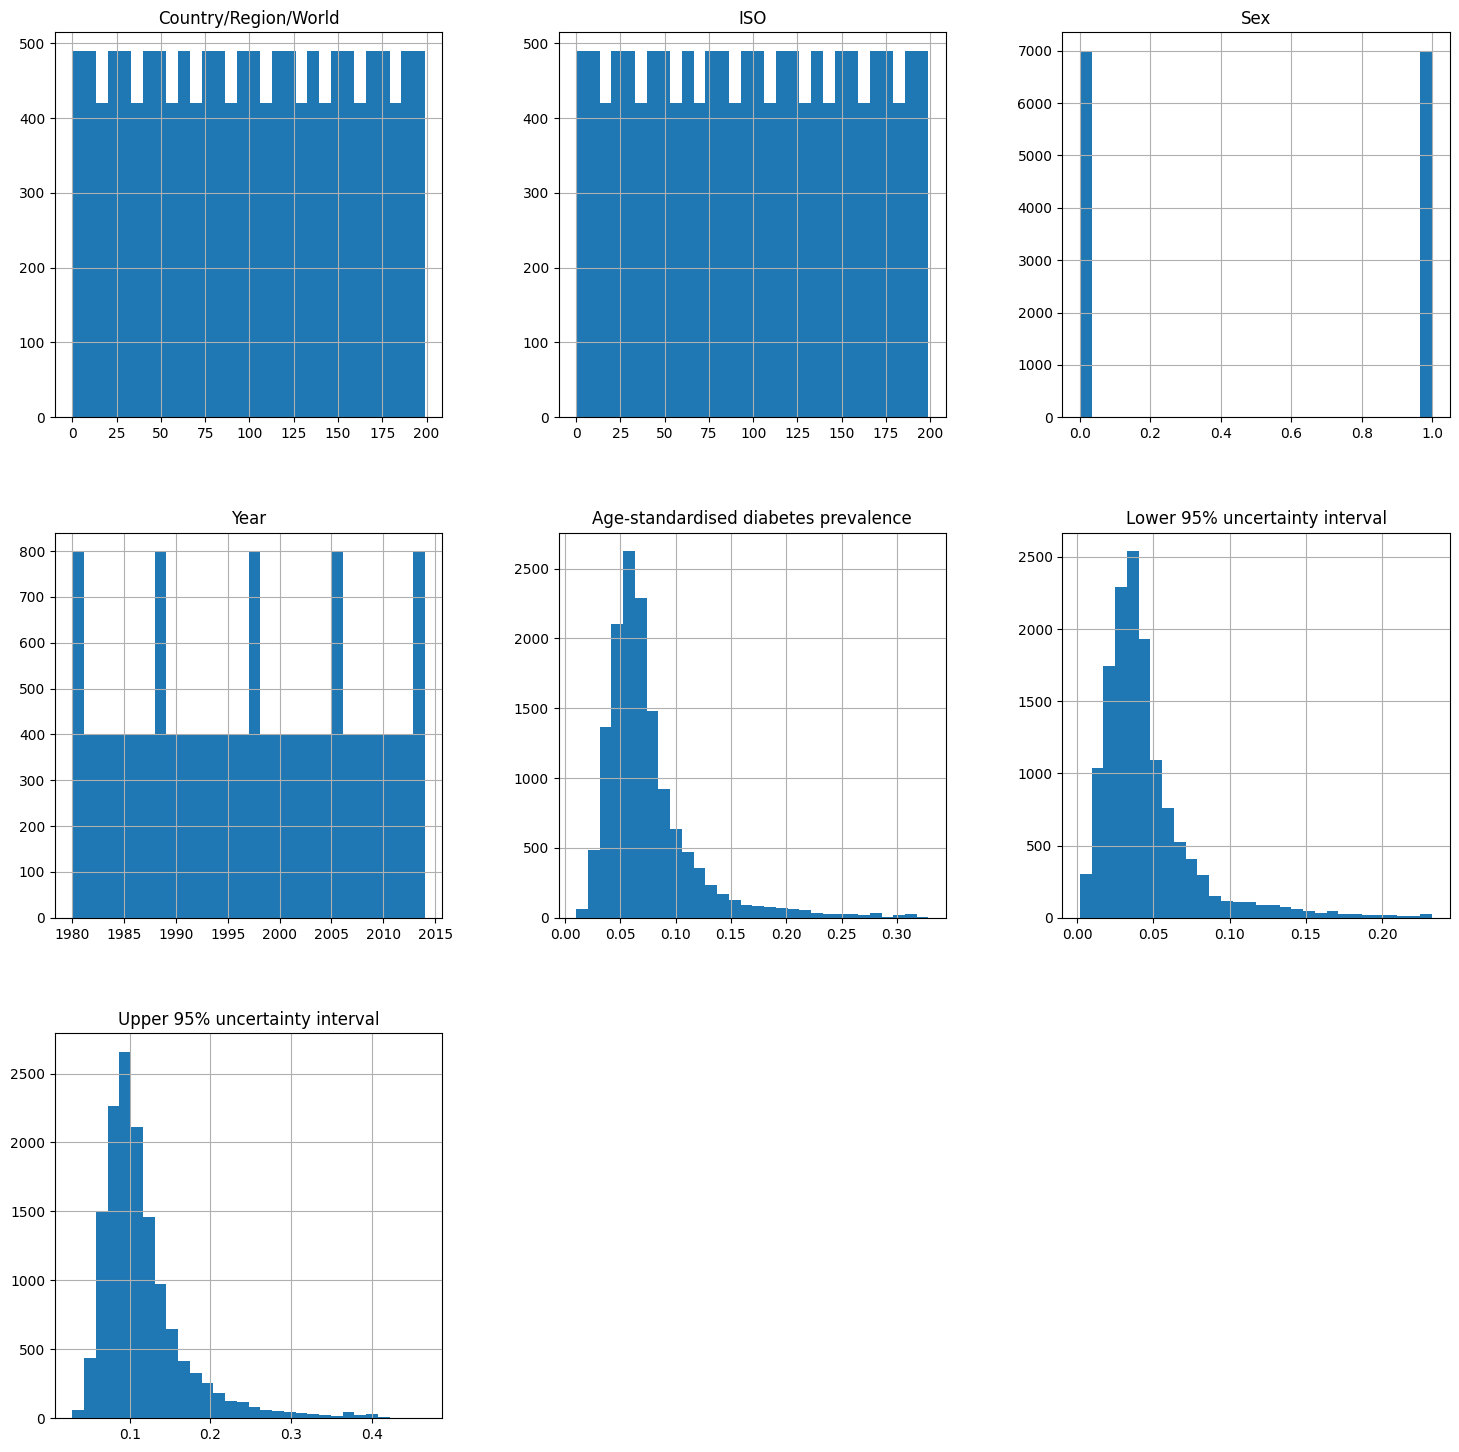

In [10]:
#Visualising data distribution in detail
fig = plt.figure(figsize =(18,18))
ax=fig.gca()
df.hist(ax=ax,bins =30)
plt.show()

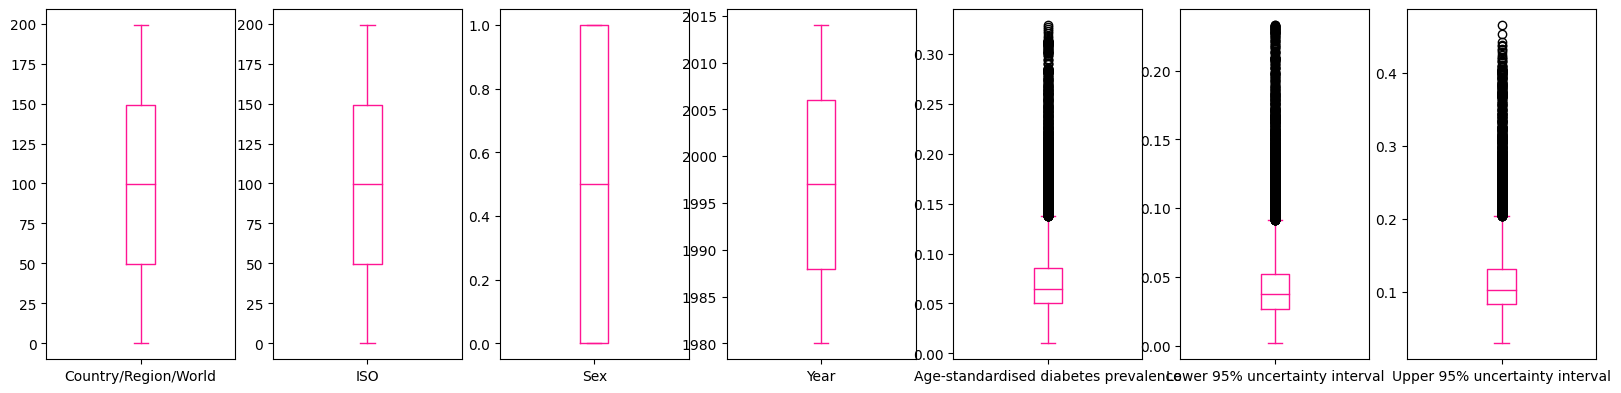

In [11]:
#detecting outliers
df.plot(kind='box', subplots=True, layout=(2,7), sharex=False, sharey=False, figsize=(20, 10), color='deeppink');

In [12]:
#identify the outliers
# define continuous variable & plot
continous_features = ['Country/Region/World','ISO','Sex','Year','Age-standardised diabetes prevalence','Lower 95% uncertainty interval','Upper 95% uncertainty interval']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
outliers(df[continous_features])


For the feature Country/Region/World, No of Outliers is 0
For the feature ISO, No of Outliers is 0
For the feature Sex, No of Outliers is 0
For the feature Year, No of Outliers is 0
For the feature Age-standardised diabetes prevalence, No of Outliers is 969
For the feature Lower 95% uncertainty interval, No of Outliers is 976
For the feature Upper 95% uncertainty interval, No of Outliers is 892


In [13]:
#drop the outliers
outliers(df[continous_features], drop = True)

Outliers from Country/Region/World feature removed
Outliers from ISO feature removed
Outliers from Sex feature removed
Outliers from Year feature removed
Outliers from Age-standardised diabetes prevalence feature removed
Outliers from Lower 95% uncertainty interval feature removed
Outliers from Upper 95% uncertainty interval feature removed


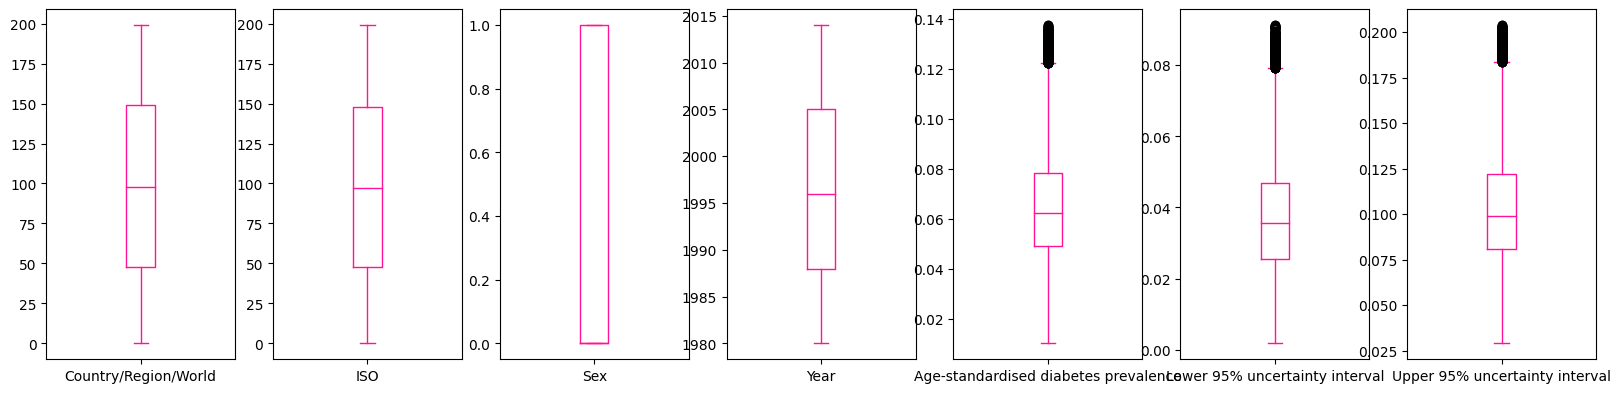

In [14]:
#check if outliers got removed
df.plot(kind='box', subplots=True,layout=(2,7),sharex=False,sharey=False,figsize=(20, 10),color='deeppink');

In [15]:
#Checking data shape after outlier removal
df.shape

(12874, 7)

In [16]:
df

Country/Region/World  ISO  Sex  Year  \
0                         0    0    0  1980   
1                         0    0    0  1981   
2                         0    0    0  1982   
3                         0    0    0  1983   
4                         0    0    0  1984   
...                     ...  ...  ...   ...   
13995                   199  199    1  2010   
13996                   199  199    1  2011   
13997                   199  199    1  2012   
13998                   199  199    1  2013   
13999                   199  199    1  2014   

       Age-standardised diabetes prevalence  Lower 95% uncertainty interval  \
0                                  0.044712                        0.015339   
1                                  0.046114                        0.016883   
2                                  0.047601                        0.018745   
3                                  0.049173                        0.020375   
4                                  0.050834                        0.022269   
...                                     ...                             ...   
13995                              0.072249                        0.043879   
13996                              0.072956                        0.042840   
13997                              0.073752                        0.041895   
13998                              0.074616                        0.040434   
13999                              0.075607                        0.039080   

       Upper 95% uncertainty interval  
0                            0.094918  
1                            0.093777  
2                            0.094018  
3                            0.093950  
4                            0.093679  
...                               ...  
13995                        0.108806  
13996                        0.112512  
13997                        0.116488  
13998                        0.121880  
13999                        0.127219  

[12874 rows x 7 columns]

In [17]:
df.rename(columns = {'Age-standardised diabetes prevalence':'ASDP'}, inplace = True)  

In [18]:
df.rename(columns = {'Lower 95% uncertainty interval':'Lower_95_uncertainty'}, inplace = True)  

In [19]:
df.rename(columns = {'Upper 95% uncertainty interval':'Upper_95_uncertainty'}, inplace = True)  

In [20]:
df.head()

Country/Region/World  ISO  Sex  Year      ASDP  Lower_95_uncertainty  \
0                     0    0    0  1980  0.044712              0.015339   
1                     0    0    0  1981  0.046114              0.016883   
2                     0    0    0  1982  0.047601              0.018745   
3                     0    0    0  1983  0.049173              0.020375   
4                     0    0    0  1984  0.050834              0.022269   

   Upper_95_uncertainty  
0              0.094918  
1              0.093777  
2              0.094018  
3              0.093950  
4              0.093679

0.094918    1
0.069763    1
0.090043    1
0.086963    1
0.083861    1
           ..
0.083416    1
0.082925    1
0.081733    1
0.081410    1
0.127219    1
Name: Upper_95_uncertainty, Length: 12874, dtype: int64


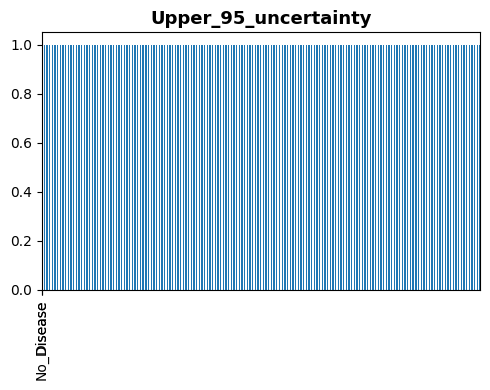

In [21]:
print(df.Upper_95_uncertainty.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["Disease", "No_Disease"]
ax = df.Upper_95_uncertainty.value_counts().plot(kind='bar')
ax.set_title("Upper_95_uncertainty", fontsize = 13, weight = 'bold')
ax.set_xticks(range(len(name)))
ax.set_xticklabels (name)


    
plt.tight_layout()



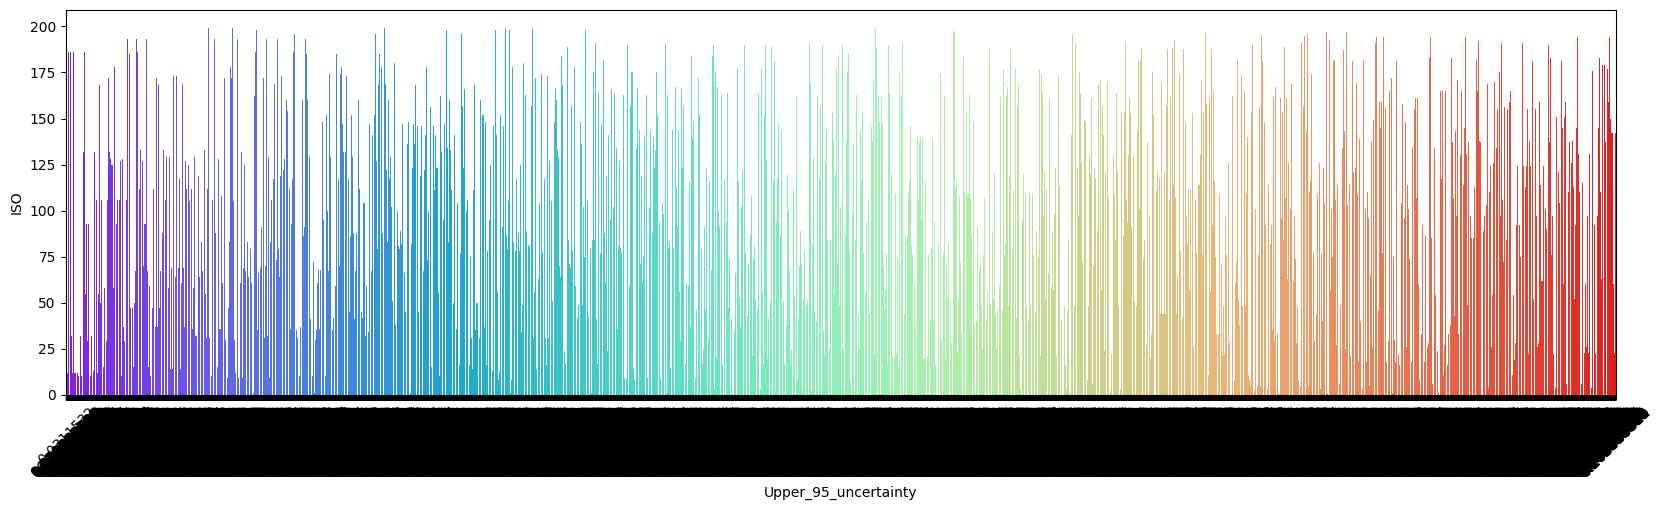

In [22]:
plt.figure(figsize=(20,5))
sns.barplot(x = "Upper_95_uncertainty",y = "ISO", data = df, palette = "rainbow")
plt.xticks(rotation=45)
plt.show()


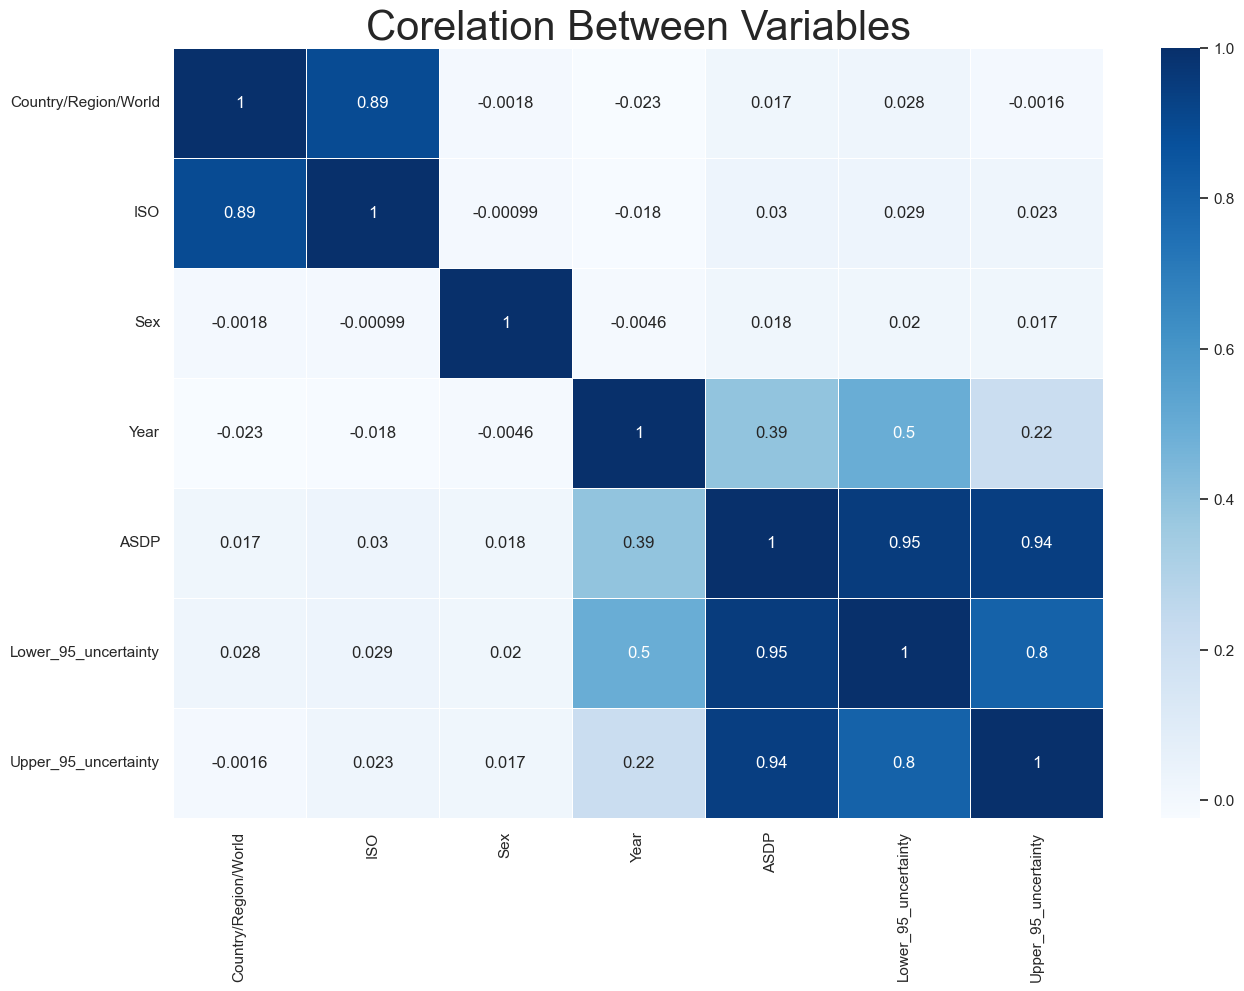

In [23]:
#check correlation between variables
sns.set(style="darkgrid") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

In [24]:
from ydata_profiling import ProfileReport

In [25]:
profile = ProfileReport(df,title="Diabetes EDA",html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
#pre-processing
from sklearn.exceptions import DataDimensionalityWarning
#encode object columns to integers
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

In [27]:
for col in df:
    if df[col].dtype =='object':
        df[col]=OrdinalEncoder().fit_transform(df[col].values.reshape(-1,1))
df

Country/Region/World  ISO  Sex  Year      ASDP  Lower_95_uncertainty  \
0                         0    0    0  1980  0.044712              0.015339   
1                         0    0    0  1981  0.046114              0.016883   
2                         0    0    0  1982  0.047601              0.018745   
3                         0    0    0  1983  0.049173              0.020375   
4                         0    0    0  1984  0.050834              0.022269   
...                     ...  ...  ...   ...       ...                   ...   
13995                   199  199    1  2010  0.072249              0.043879   
13996                   199  199    1  2011  0.072956              0.042840   
13997                   199  199    1  2012  0.073752              0.041895   
13998                   199  199    1  2013  0.074616              0.040434   
13999                   199  199    1  2014  0.075607              0.039080   

       Upper_95_uncertainty  
0                  0.094918  
1                  0.093777  
2                  0.094018  
3                  0.093950  
4                  0.093679  
...                     ...  
13995              0.108806  
13996              0.112512  
13997              0.116488  
13998              0.121880  
13999              0.127219  

[12874 rows x 7 columns]

In [28]:
class_label =df['Upper_95_uncertainty']
df = df.drop(['Upper_95_uncertainty'], axis =1)
df = (df-df.min())/(df.max()-df.min())
df['Upper_95_uncertainty']=class_label
df

Country/Region/World  ISO  Sex      Year      ASDP  \
0                       0.0  0.0  0.0  0.000000  0.271755   
1                       0.0  0.0  0.0  0.029412  0.282754   
2                       0.0  0.0  0.0  0.058824  0.294421   
3                       0.0  0.0  0.0  0.088235  0.306750   
4                       0.0  0.0  0.0  0.117647  0.319783   
...                     ...  ...  ...       ...       ...   
13995                   1.0  1.0  1.0  0.882353  0.487798   
13996                   1.0  1.0  1.0  0.911765  0.493348   
13997                   1.0  1.0  1.0  0.941176  0.499591   
13998                   1.0  1.0  1.0  0.970588  0.506370   
13999                   1.0  1.0  1.0  1.000000  0.514144   

       Lower_95_uncertainty  Upper_95_uncertainty  
0                  0.151652              0.094918  
1                  0.168900              0.093777  
2                  0.189703              0.094018  
3                  0.207911              0.093950  
4                  0.229069              0.093679  
...                     ...                   ...  
13995              0.470485              0.108806  
13996              0.458880              0.112512  
13997              0.448317              0.116488  
13998              0.431997              0.121880  
13999              0.416872              0.127219  

[12874 rows x 7 columns]

In [29]:
#pre-processing
diabetes_data = df.copy()
le = preprocessing.LabelEncoder()
Country = le.fit_transform(list(diabetes_data["Country/Region/World"])) # country
ISO = le.fit_transform(list(diabetes_data["ISO"])) # country code as from 0 to 199
Sex = le.fit_transform(list(diabetes_data["Sex"])) # gender (1 = male; 0 = female)
Year = le.fit_transform(list(diabetes_data["Year"])) # distinct years
ASDP = le.fit_transform(list(diabetes_data["ASDP"])) # Age-standardised diabetes prevalence
Lower_95_uncertainty = le.fit_transform(list(diabetes_data["Lower_95_uncertainty"])) # lower 95% uncertainty level
Upper_95_uncertainty = le.fit_transform(list(diabetes_data["Upper_95_uncertainty"])) # upper 95% uncertainty level

In [30]:
x = list(zip(Country, ISO, Sex, Year, ASDP, Lower_95_uncertainty))
y = list(Upper_95_uncertainty)

In [31]:
# Predictive analytics model development by comparing different Scikit-learn classification algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

accu = 0
for i in range(0,14000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .80, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempacc = r2_score(y_test,y_pred)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 97.99787587184308 found on randomstate 8907


In [33]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [34]:
models = [SVC(), RandomForestClassifier()]

model_names = ["SVM", "RF"]

In [35]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
root_mean_e=[]
r2=[]

for m in models:
    m.fit(x_train,y_train)
    print("Score of", m, "is:", m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test,predm))
    mean_abs_e.append(mean_absolute_error(y_test,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test,predm))
    mean_sqr_e.append(mean_squared_error(y_test,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test,predm)))
    root_mean_e.append(np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 SCORE: ", r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    print("**********************************************************************************************************")
    print('\n\n')
 

Score of SVC() is: 1.0

ERROR:
MEAN ABSOLUTE ERROR:  263.9599029126214
MEAN SQUARED ERROR:  138805.60339805824
ROOT MEAN SQUARED ERROR : 372.5662402822594
R2 SCORE:  0.9899101664008212
**********************************************************************************************************



Score of RandomForestClassifier() is: 1.0

ERROR:
MEAN ABSOLUTE ERROR:  482.3473786407767
MEAN SQUARED ERROR:  589922.2341747573
ROOT MEAN SQUARED ERROR : 768.0639518781995
R2 SCORE:  0.9571183220737155
**********************************************************************************************************





In [36]:
import numpy as np

print(np.isnan(x_train).sum())
print(np.isnan(y_train).sum())


0
0


In [37]:
from sklearn.model_selection import KFold

mean_score=[]
STD=[]
cv = KFold(n_splits=5, shuffle=True, random_state=42)
for m in models:
    CV=cross_val_score(m, x_train, y_train, cv=cv, scoring="r2")
    print("SCORE OF",m,"Is as follows...")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")


SCORE OF SVC() IS as follows...
SCORE IS: [0.98959105 0.99015495 0.99051869 0.99038012 0.9888938 ]
MEAN OF SCORE is : 0.989907722764853
Standard Deviation : 0.0005976422440085916
**************************************************************************************************



SCORE OF RandomForestClassifier() IS as follows...
SCORE IS: [0.94563569 0.95100861 0.92868476 0.9450293  0.94798052]
MEAN OF SCORE is : 0.943667774716574
Standard Deviation : 0.00778080753088545
**************************************************************************************************





In [38]:
Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score,
                                  "CV_mean_score": mean_score,
                                  "CV_STD": STD,
                                  "MBE": mean_abs_e,
                                  "MSE": mean_sqr_e,
                                  "RMSE": root_mean_e,
                                  "R2":r2 
                                 })
Regression_result.sort_values(by="CV_mean_score", ascending=False)

MODEL  SCORE  CV_mean_score    CV_STD         MBE            MSE  \
0   SVM    1.0       0.989908  0.000598  263.959903  138805.603398   
1    RF    1.0       0.943668  0.007781  482.347379  589922.234175   

         RMSE        R2  
0  372.566240  0.989910  
1  768.063952  0.957118

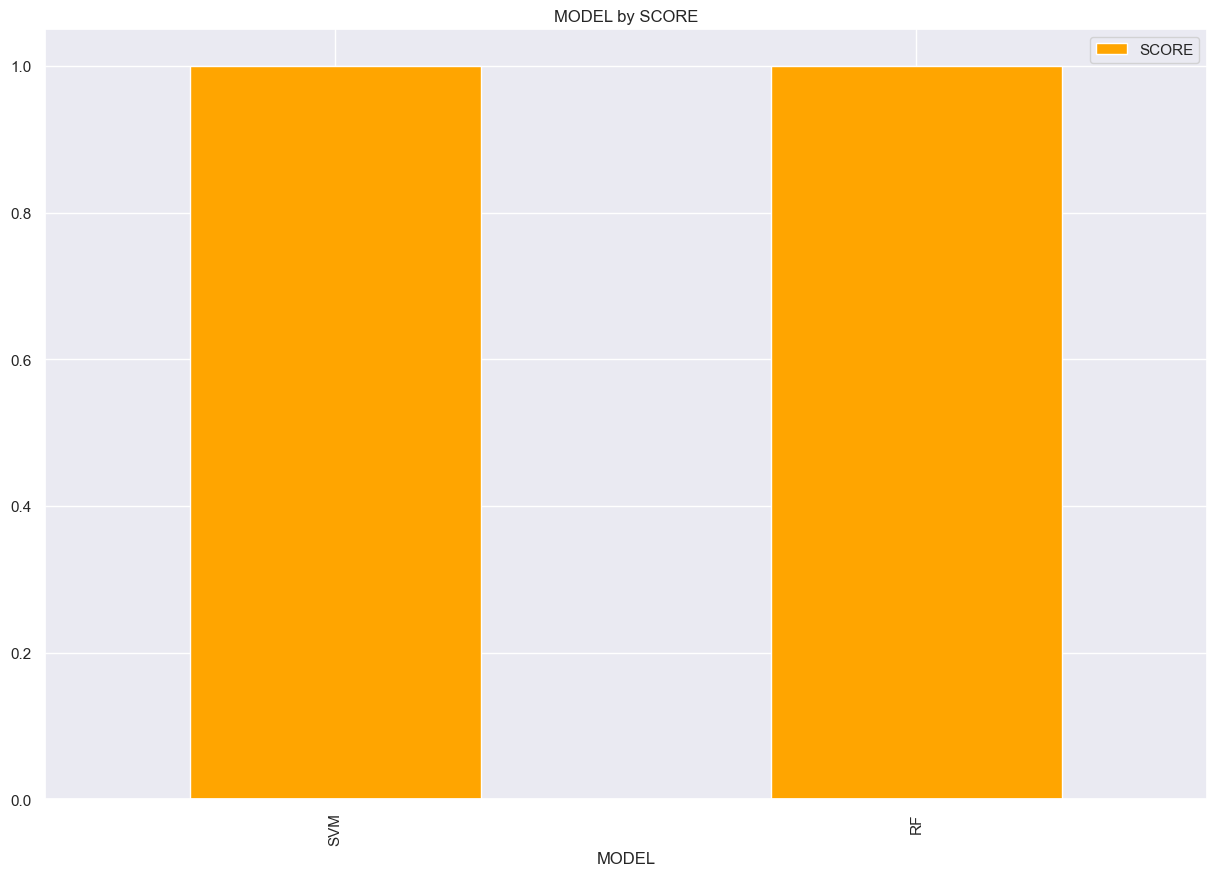

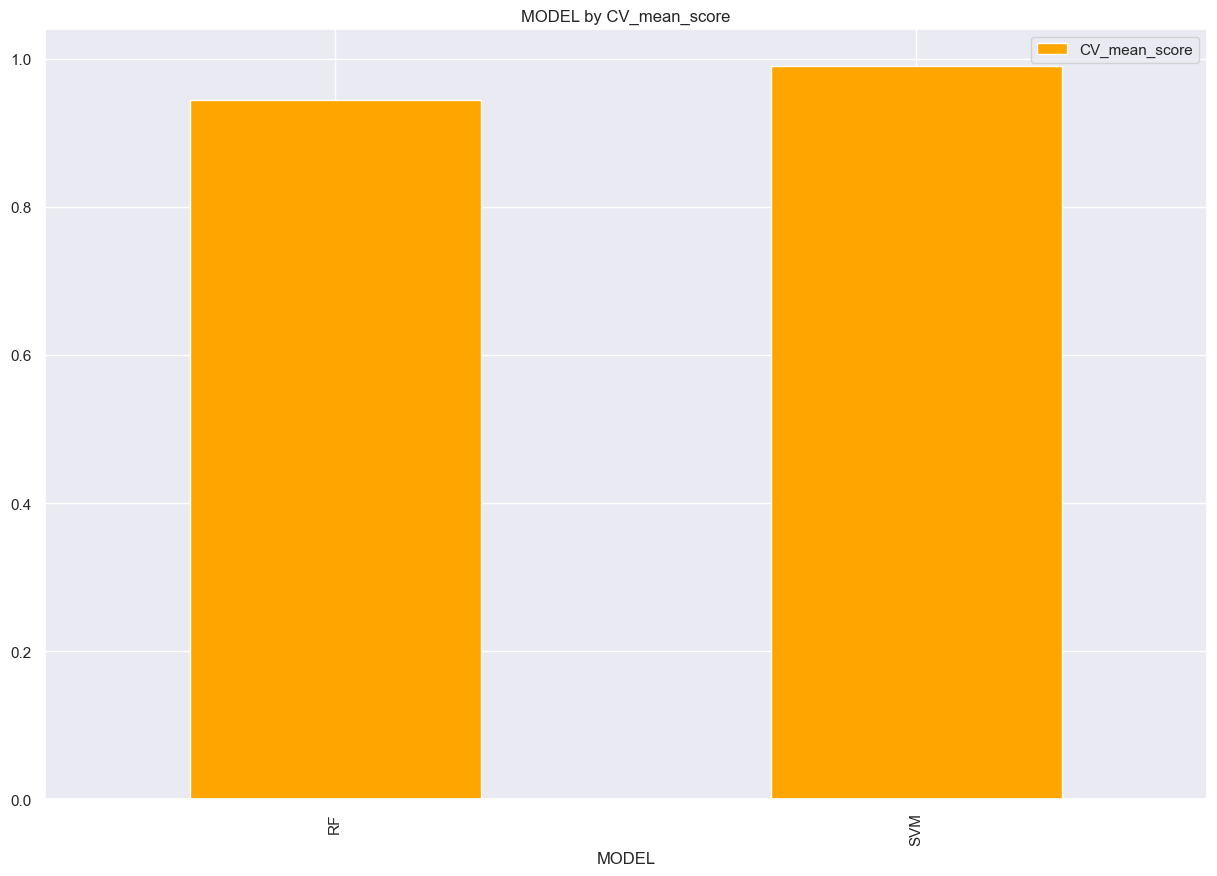

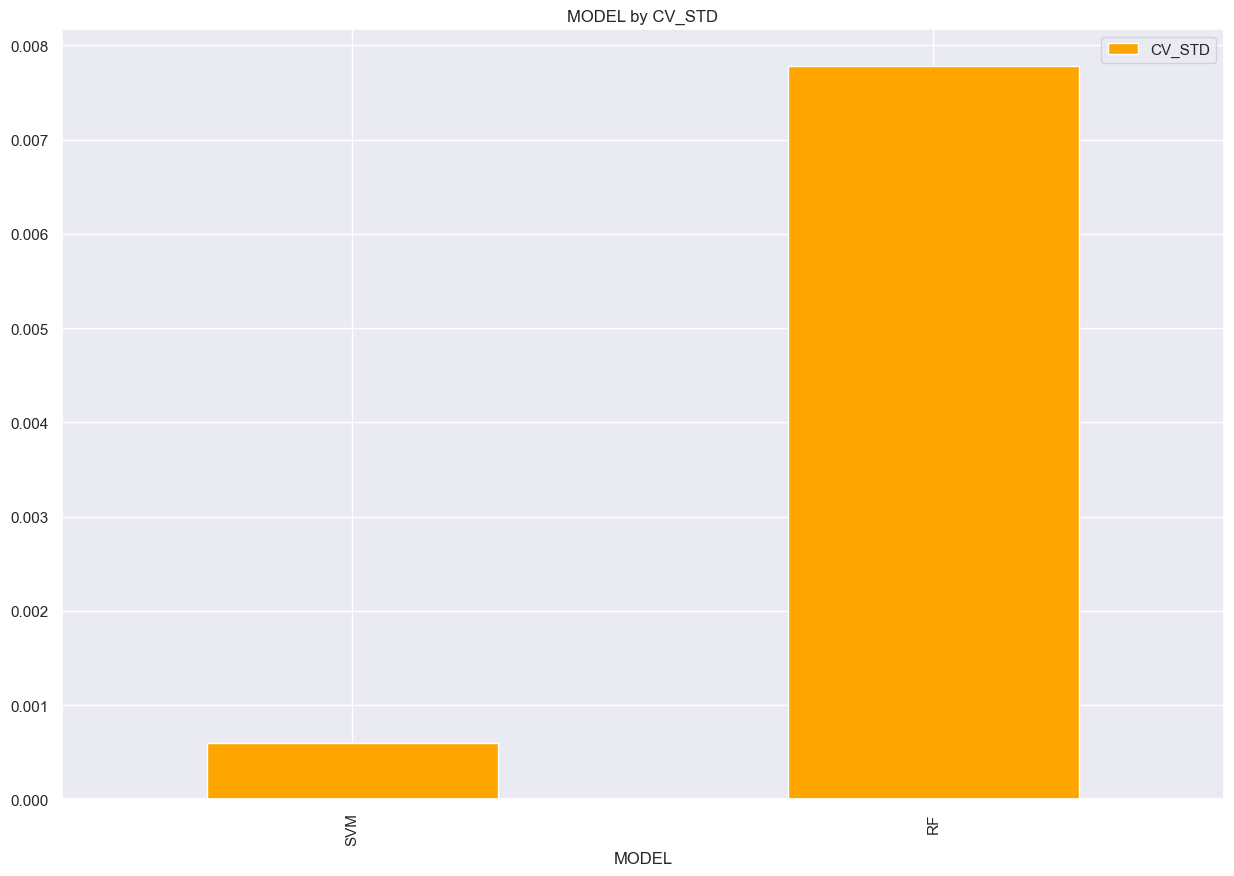

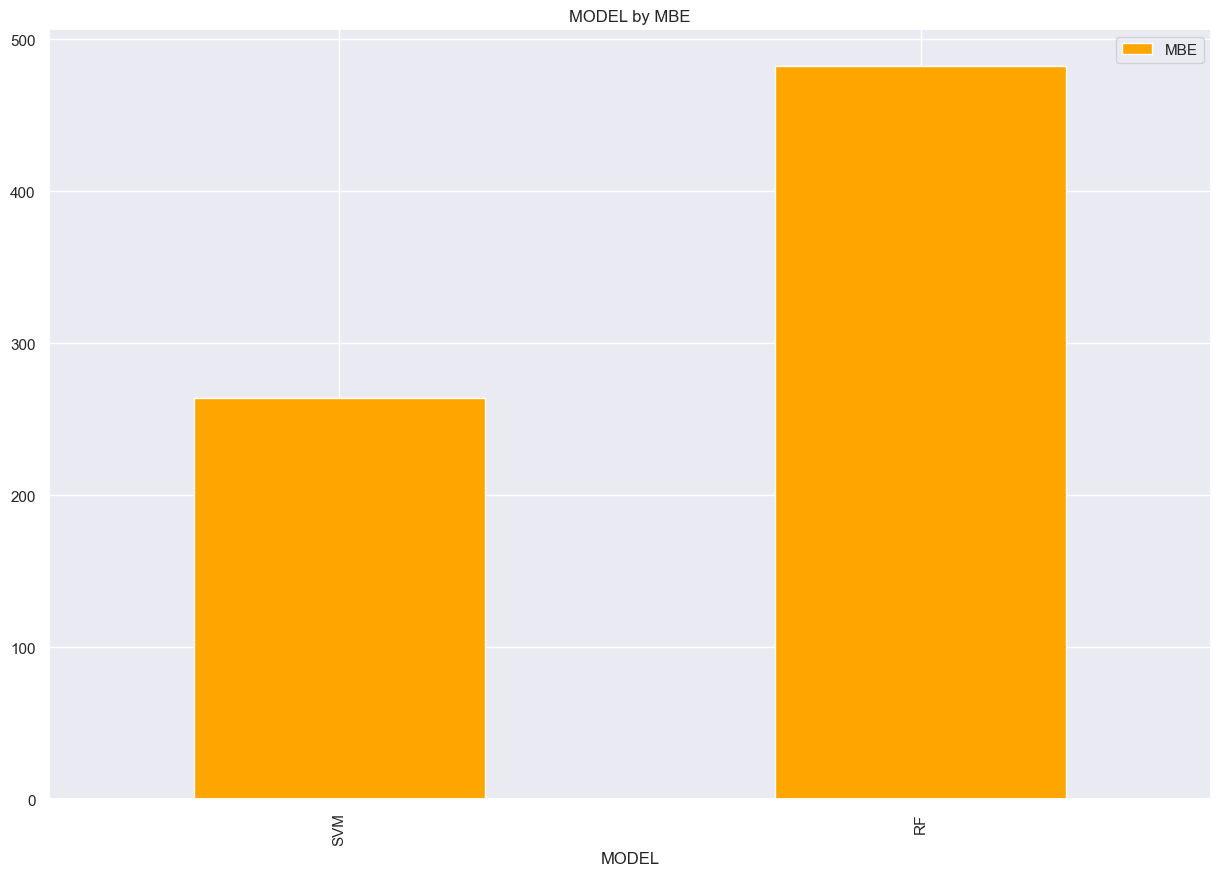

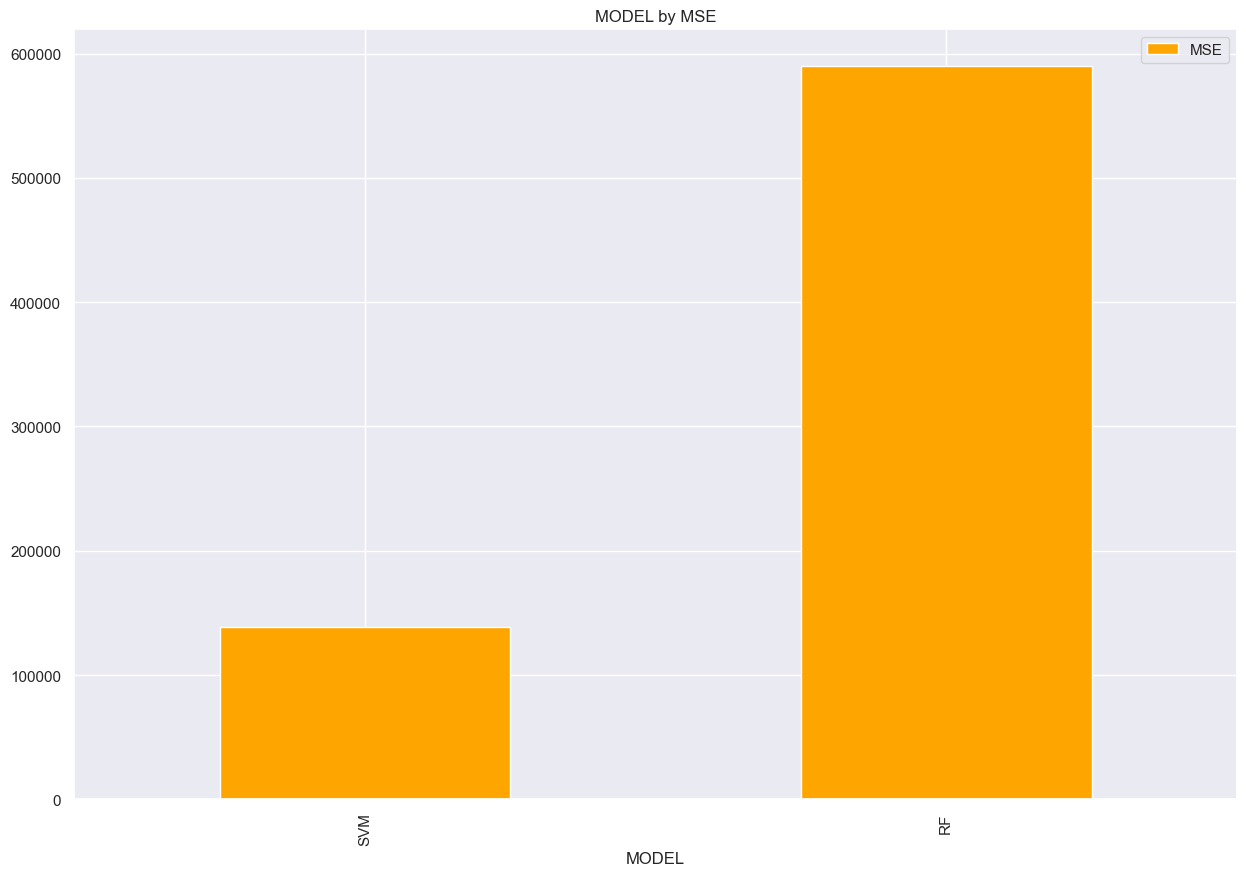

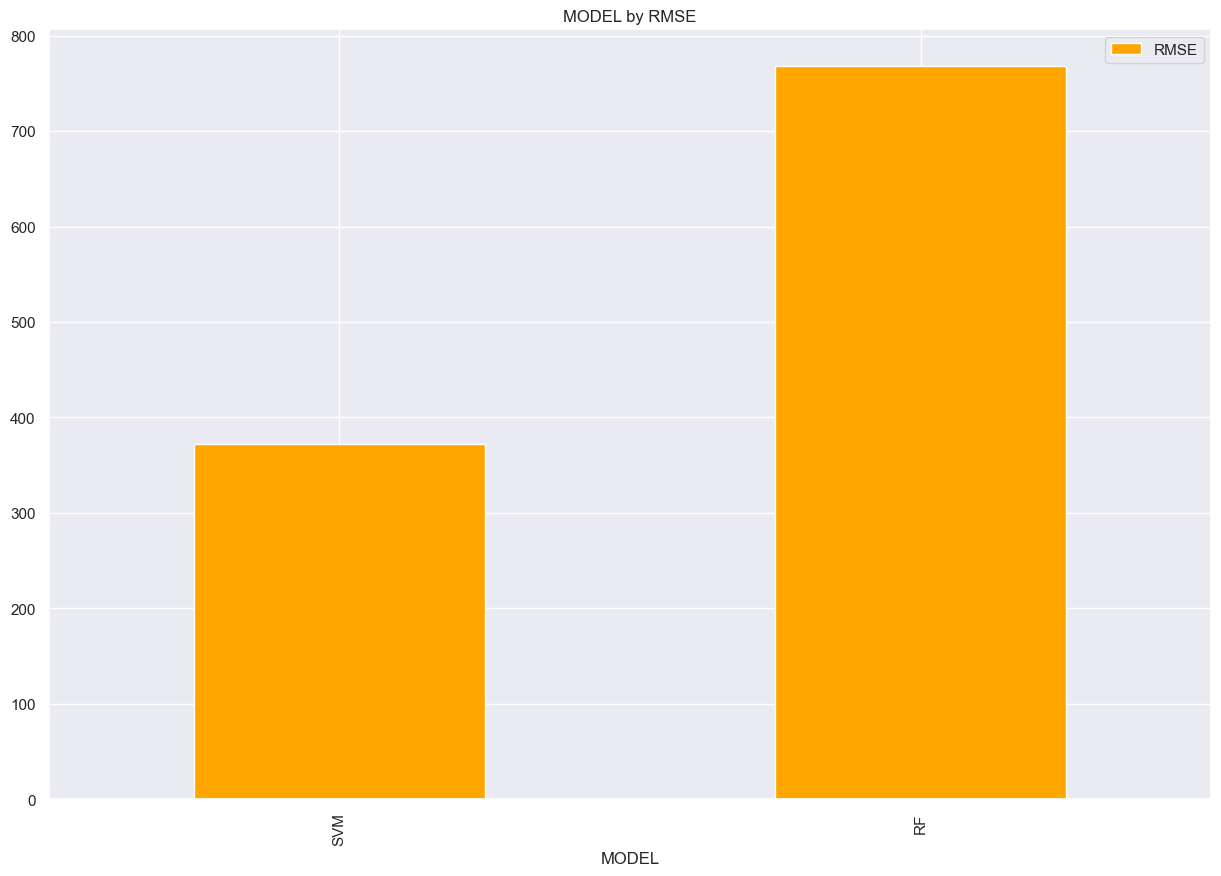

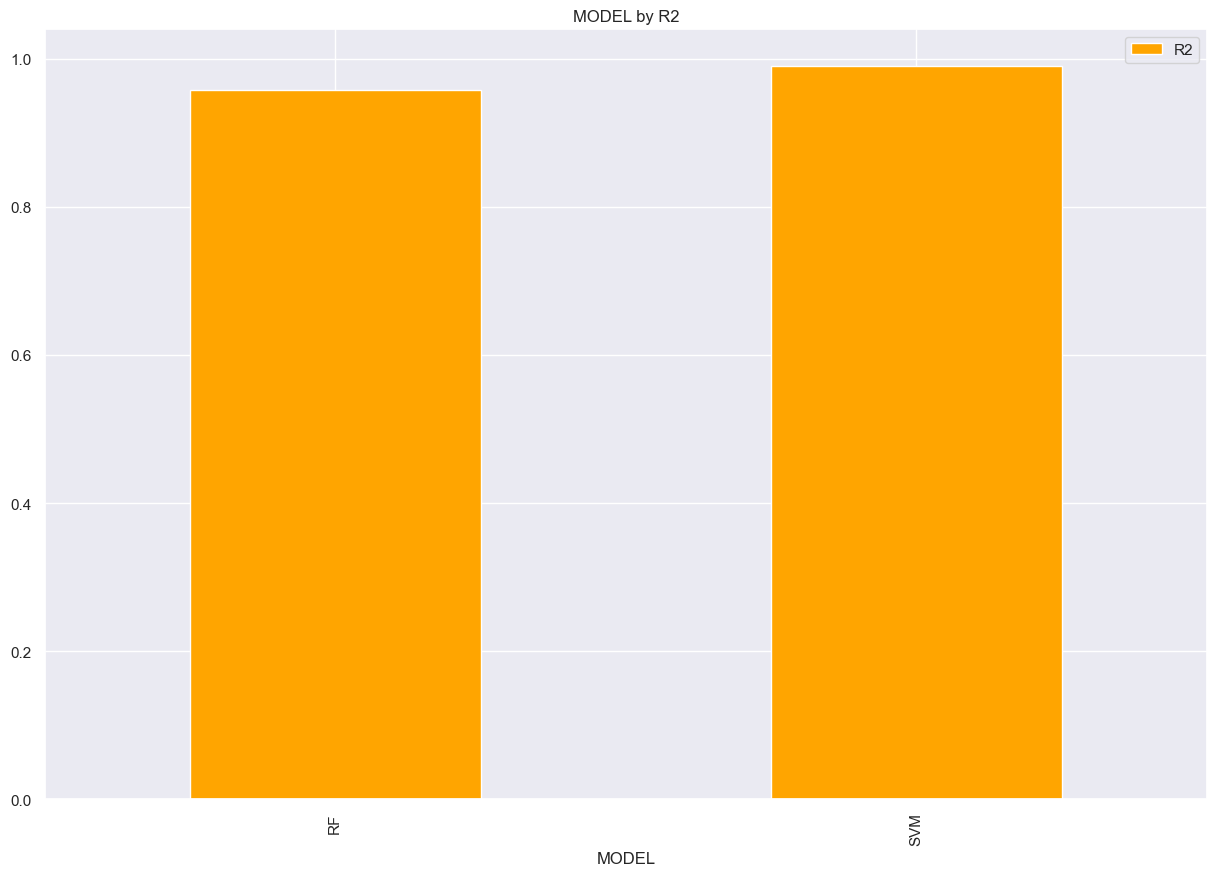

In [39]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = "orange")
    plt.title(f"MODEL by {metric}")
    plt.show()

In [40]:
rf = RandomForestRegressor(random_state=42)

In [41]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
predm=rf.predict(x_test)

In [43]:
predm

array([ 9619.37,  6285.46, 12528.67, ...,  6990.63,  5410.73,  8676.8 ])

In [44]:
#saving the file
import pickle
filename = 'savedmodel.sav'
pickle.dump(rf, open(filename,'wb'))

In [45]:
load_model = pickle.load(open(filename, 'rb'))

In [46]:
os.getcwd()

'C:\\Users\\DELL\\Downloads\\prediction(flask)'

Does the average age-standardized death rate (ASDP) vary by sex?

<AxesSubplot: xlabel='Sex', ylabel='ASDP'>

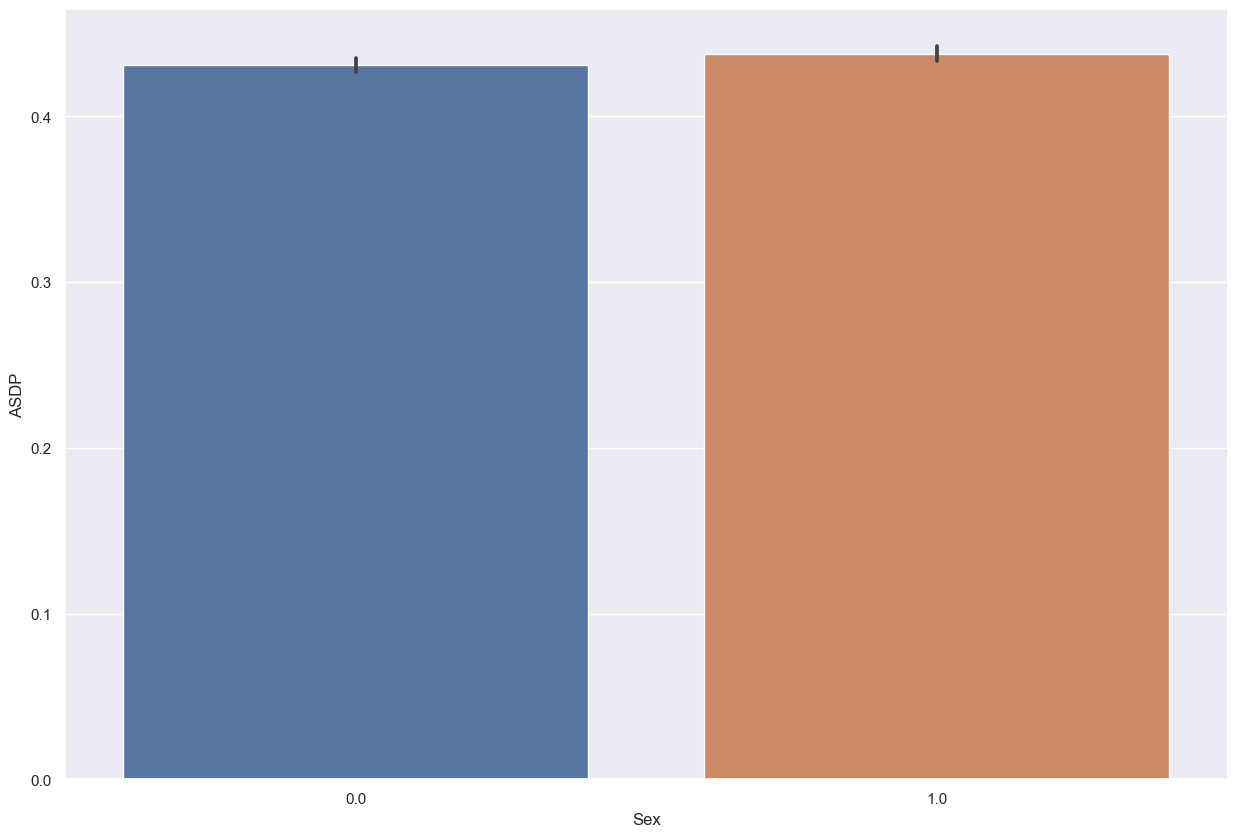

In [47]:
# Create a barplot to compare ASDP by sex
sns.barplot(x="Sex", y="ASDP", data=df)


How has ASDP changed over the years?

<AxesSubplot: xlabel='Year', ylabel='ASDP'>

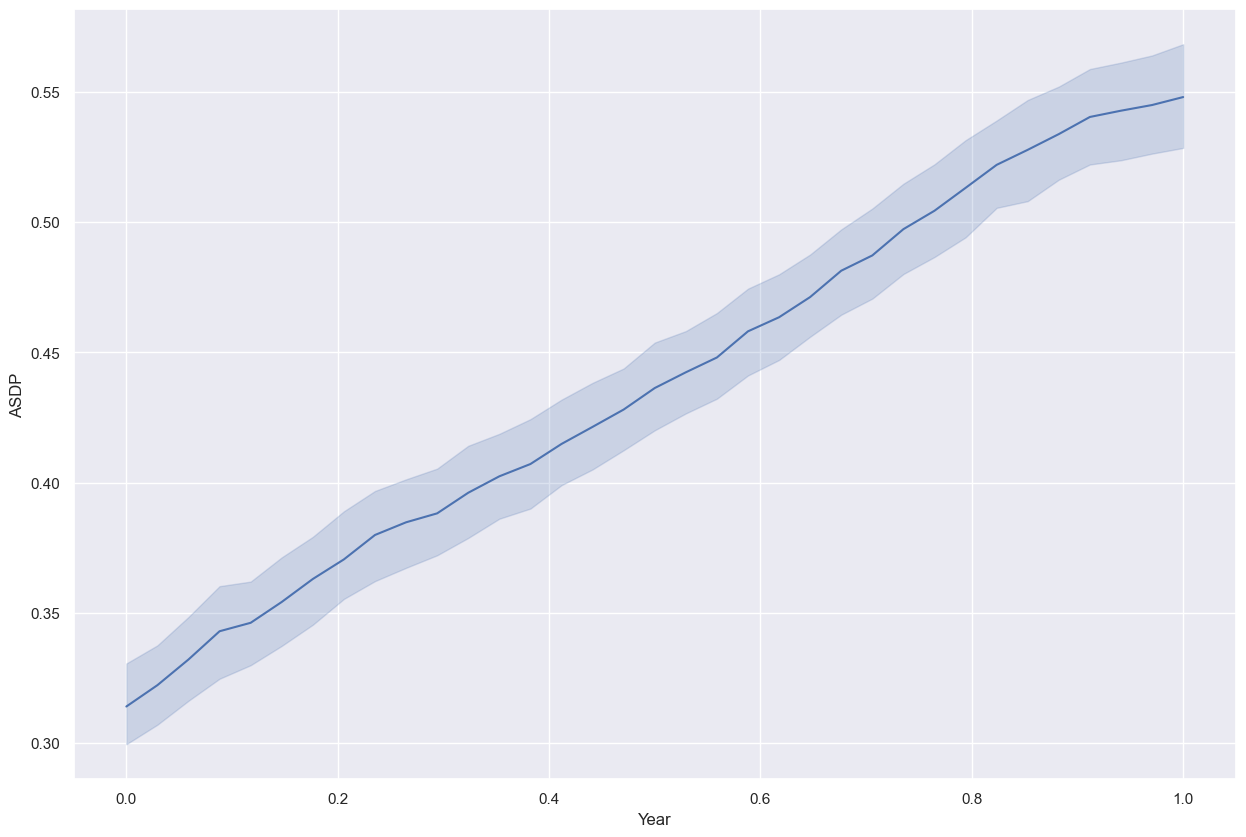

In [48]:
# Create a lineplot to visualize ASDP over time
sns.lineplot(x="Year", y="ASDP", data=df)


Which countries have the highest and lowest ASDP?

<AxesSubplot: xlabel='Country/Region/World', ylabel='ASDP'>

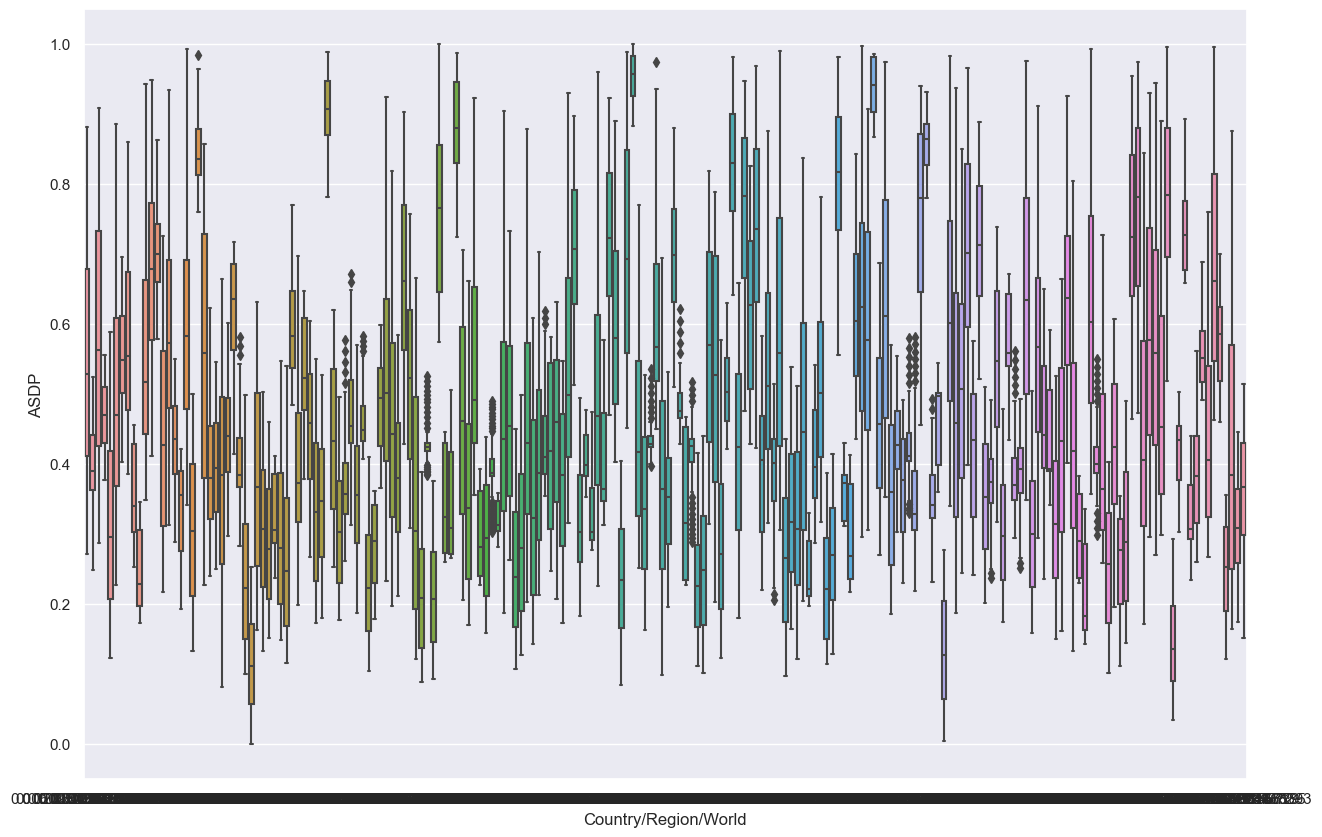

In [49]:
# Create a boxplot to visualize ASDP distribution by country
sns.boxplot(x="Country/Region/World", y="ASDP", data=df)


Can we predict the ASDP for a given country based on its sex and year?

In [51]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[["Sex", "Year"]], df["ASDP"], test_size=0.2, random_state=42)

# Train a support vector regression model
svr = SVR(kernel="linear")
svr.fit(X_train, y_train)

# Predict the ASDP for the testing set and calculate the mean squared error
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)


Mean squared error: 0.02850184039275477


<AxesSubplot: xlabel='Lower_95_uncertainty', ylabel='ASDP'>

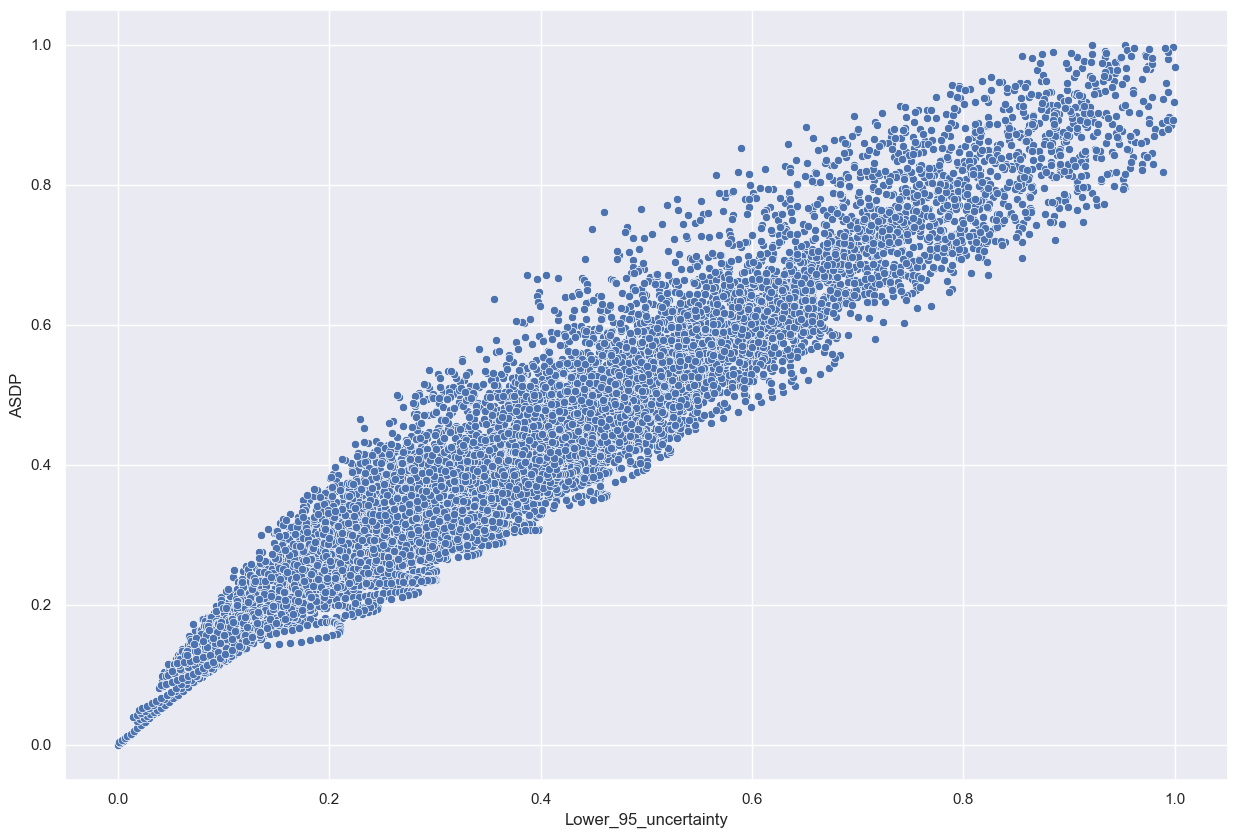

In [52]:
# Create a scatterplot to visualize the relationship between ASDP and Lower_95_uncertainty per capita
sns.scatterplot(x="Lower_95_uncertainty", y="ASDP", data=df)